<a href="https://colab.research.google.com/github/amandahaff/MAT422/blob/main/2_2_HW_Haffner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Probability Distribution**

A probability distribution is the mathematical function that gives the prob-
abilities of occurrence of different possible outcomes for an experiment. There are both discrete and continuous probability distributions.


Conditional  Probability

Conditional probability is defined as the likelihood of an event or outcome
occurring, based on the occurrence of a previous event or outcome. The con-
ditional probability is expressed as a ratio of unconditional probabilities: The
numerator is the probability of the intersection of the two events, whereas the
denominator is the probability of the conditioning event.

Example:
A family has two children.
What is the probability that both are girls, given that the older child is a girl?
What is the probability that both are girls, given that at least one of the children is a girl?

In [5]:
import enum, random
class Kid(enum.Enum):
    BOY = 0
    GIRL = 1
def random_kid() -> Kid:
    return random.choice([Kid.BOY, Kid.GIRL])
both_girls = 0
older_girl = 0
either_girl = 0
random.seed(0)
for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    if older == Kid.GIRL:
        older_girl += 1
    if older == Kid.GIRL and younger == Kid.GIRL:
        both_girls += 1
    if older == Kid.GIRL or younger == Kid.GIRL:
        either_girl += 1
print("P(both | older):", both_girls / older_girl)
print("P(both | either):", both_girls / either_girl)

P(both | older): 0.5007089325501317
P(both | either): 0.3311897106109325


Discrete Random Variables

A discrete random variable is a random variable whose pos-
sible values either constitute a finite set or else can be listed in an infinite
sequence. Discrete Values are usually counted.

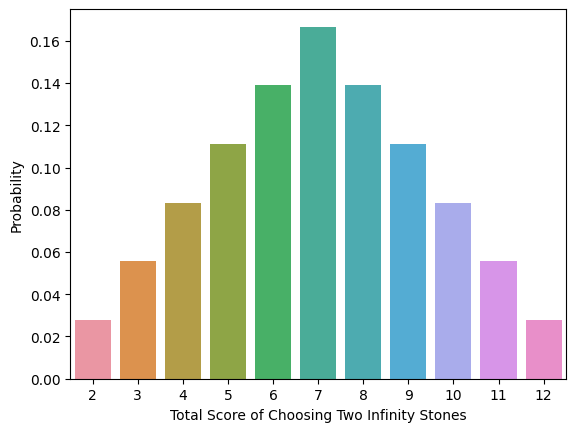

In [7]:
from itertools import product
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

stones = ['Space', 'Reality', 'Mind', 'Time', 'Power', 'Soul']

# assign scores to each stone
stones_scores = dict(zip(stones, range(1, 7)))

# compute overall scores for choosing two stones
X_omega = {
    (stone1, stone2): stones_scores[stone1] + stones_scores[stone2]
    for stone1, stone2 in product(stones, repeat=2)
}

# total elements in space space
total_sample_outcomes = len(X_omega)

# count frequencies of each value the random variable can assume
frequencies = dict.fromkeys(X_omega.values(), 0)
for sample_outcome, overall_score in X_omega.items():
    frequencies[overall_score] += 1

# compute probabilities
probabilities = pd.DataFrame(
    data=[
        [value, frequency / total_sample_outcomes]
        for value, frequency in frequencies.items()
    ],
    columns=['Total Score of Choosing Two Infinity Stones', 'Probability']
)

# plot PMF as barplot
ax = sns.barplot(
    x='Total Score of Choosing Two Infinity Stones',
     y='Probability',
    data=probabilities,
)
plt.savefig("pmf")

Continuous Random Variables

A random variable X is continuous if possible values comprise either a single
interval on the number line or a union of disjoint intervals. Continuous Values are usually measured.

Normal Distribution

A standard normal distribution has a mean of 0 and standard deviation of 1.
100 random values were generated between -5 and 5.


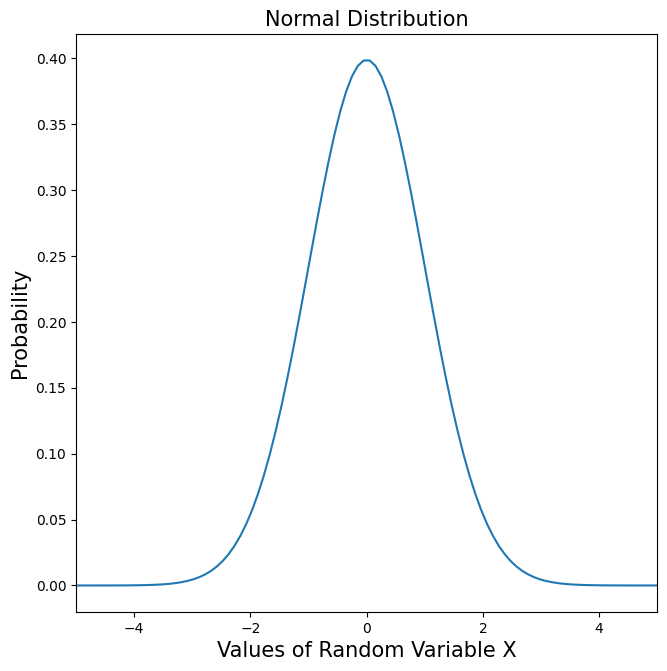

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
mu = 0
std = 1
snd = stats.norm(mu, std)
x = np.linspace(-5, 5, 100)
plt.figure(figsize=(7.5,7.5))
plt.plot(x, snd.pdf(x))
plt.xlim(-5, 5)
plt.title('Normal Distribution', fontsize='15')
plt.xlabel('Values of Random Variable X', fontsize='15')
plt.ylabel('Probability', fontsize='15')
plt.show()